In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
import pyrenn as prn


### Import datasets

In [2]:
april = pd.read_excel("database/wind_series/april_92.xls", header=None, names=['A'])
april = pd.DataFrame(april)
may = pd.read_excel("database/wind_series/may_92.xls", header=None, names=['M'])
may = pd.DataFrame(may)

### Define Lags

In [3]:
lag = [1, 2, 3, 4, 5, 25, 200]

#### Train test split data sets

In [25]:
lag_april = april.iloc[200:4320].reset_index(drop=True)
lag_may_val = may.iloc[200:2500].reset_index(drop=True)
lag_may_tst = may.iloc[2501:4460].reset_index(drop=True)

#dataset
X_train = lag_april
X_val = lag_may_val
X_test = lag_may_tst

Y_train = april.iloc[200:4320]
Y_val = may.iloc[200:2500]
Y_test = may.iloc[2501:4460]

#### Normalize Datasets

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Y_train = scaler.fit_transform(Y_train).flatten()
Y_val = scaler.fit_transform(Y_val).flatten()
Y_test = scaler.fit_transform(Y_test).flatten()

### Building Network

In [19]:
nn  = prn.CreateNN([1,100,1], dIn=[0,1,2,3,4,5,25,200])

#### Train

In [20]:
regr = prn.train_LM(X_train.T, Y_train, nn ,verbose=True, k_max=100,E_stop=1e-3)

Iteration:  0 		Error:  6063.776383030778 	scale factor:  3.0
Iteration:  1 		Error:  5.504457280814363 	scale factor:  0.3
Iteration:  2 		Error:  0.2083241690342203 	scale factor:  0.03
Iteration:  3 		Error:  0.02291211316886629 	scale factor:  0.003
Iteration:  4 		Error:  0.0033142045540808405 	scale factor:  0.003
Iteration:  5 		Error:  0.001702035333992787 	scale factor:  0.003
Iteration:  6 		Error:  0.0011936904300751583 	scale factor:  0.003
Iteration:  7 		Error:  0.0009367309196326958 	scale factor:  0.003
Termination Error reached


##### Predict test data

In [21]:
pred = prn.NNOut(X_test.T,nn)

Text(0.5, 0, 'Data Sample')

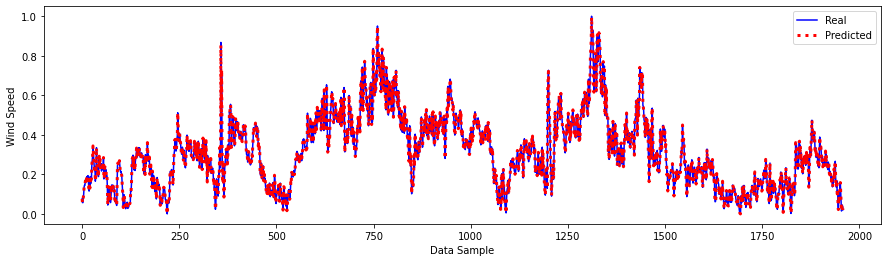

In [22]:
fig = plt.figure(figsize=(15,4))
plt.plot(np.arange(1959),Y_test.flatten(), 'b',label='Real')
plt.plot(np.arange(1959),pred.flatten(), color='r',linestyle=':',lw=3, markersize=5,label='Predicted')
plt.legend()
plt.ylabel("Wind Speed")
plt.xlabel("Data Sample")

##### Predict validation data

In [23]:
pred_val = prn.NNOut(X_val.T,nn)

Text(0.5, 0, 'Data Sample')

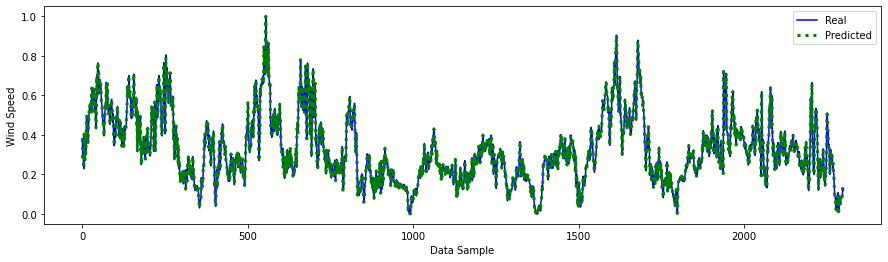

In [24]:
fig = plt.figure(figsize=(15,4))
plt.plot(np.arange(2300),Y_val.flatten(), 'b',label='Real')
plt.plot(np.arange(2300),pred_val.flatten(), color='g',linestyle=':',lw=3, markersize=5,label='Predicted')
plt.legend()
plt.ylabel("Wind Speed")
plt.xlabel("Data Sample")